In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', None)

# auto reload imports
%load_ext autoreload
%autoreload 2

The dataset is large and contains multiple sheets, so we had to load the sheets separately.

In [202]:
df = pd.read_excel("Diamond_dataset.xlsx", sheet_name="Detail")
df.shape

(577756, 92)

In [203]:
data = pd.read_excel("DIAMOND_DATASET2.xlsx", sheet_name="Detail")
data.shape

(577057, 94)

In [136]:
data1 = data.copy()

In [137]:
data1.columns

Index(['Month', 'Manager Name', 'I/O', 'Tye', 'Week', 'Barcode', 'D',
       'Org Crts', 'ASK Purity', 'Final Purity', 'Purity group', 'ASK Color',
       'Final Color', 'Color Group', 'Pcs', 'Ask Crts', 'Fin Crts',
       'Size Group', 'ASK P', 'Final Pointer', 'ASK Diam', 'Final Diam',
       'Rgh Pcs', 'Rgh Cts', 'OP', 'Remarks', 'M Purity', 'M Color', 'M Crt',
       'M Dia', 'M Poi', 'a', 'M Value', 'Final Value', 'F value',
       'Jiram Value', 'Diff (F - M)', 'Diff (F - A)', 'h', 'Pointer Diff',
       'Ask P Diff', 'P', 'A P', 'P/NP', 'A P/NP', 'b', 'M Purity2',
       'Ask Purity3', 'Final Purity4', 'M Purity Diff', 'Purity Diff',
       'M Purity5', 'Purity', 'g', 'M Col', 'Ask Col', 'Final Col',
       'M Col Diff', 'Col Diff', 'M Col6', 'Col', 'c', 'M Diameter',
       'Ask Diameter', 'Fina Diameter', 'M Dia Diff', 'Diff Diameter',
       'M Dia7', 'Dia ', 'WIP', 'S Size', 'Ask Size', 'SIZE', 'e',
       'M SC Pur Group', 'S Purity', 'M Pur Grop', 'Pur Group',
       'Diam

In [139]:
columns_to_analyze = ["Month", "Manager Name", "I/O", "Barcode", "Org Crts", "ASK Purity", "Final Purity", "Purity group", "ASK Color",
                      "Final Color", "Color Group", "Pcs", "Ask Crts", "Fin Crts", "Size Group", "ASK P", "Final Pointer", "ASK Diam",
                      "Final Diam", "Final Value", "F value", "Jiram Value", "Pointer Diff", "Ask P Diff", "Ask Size", "S Purity"]

In [224]:
data2 = data1[columns_to_analyze]

In [225]:
data2.columns

Index(['Month', 'Manager Name', 'I/O', 'Barcode', 'Org Crts', 'ASK Purity',
       'Final Purity', 'Purity group', 'ASK Color', 'Final Color',
       'Color Group', 'Pcs', 'Ask Crts', 'Fin Crts', 'Size Group', 'ASK P',
       'Final Pointer', 'ASK Diam', 'Final Diam', 'Final Value', 'F value',
       'Jiram Value', 'Pointer Diff', 'Ask P Diff', 'Ask Size', 'S Purity'],
      dtype='object')

In [226]:
data2.head()

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Pcs,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,ASK Diam,Final Diam,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
0,Jan-23,Inhouse,Inside,222625-37.1,0.209,N4,N4,I1 & above,G,G,G-J,1,0.180,0.180,0.18-0.299,0.18,0.18,3.66,3.64,76.5,0.0,0.0,0.00,0.00,0.18 - 0.299,SI1 & DOWN
1,Jan-23,Inhouse,Inside,222625A-6.1,0.171,I2,I2,I1 & above,G,G,G-J,1,0.140,0.128,0.14-0.179,0.14,0.12,3.29,3.18,60.16,0.0,0.0,0.00,-0.02,0.14 - 0.179,SI1 & DOWN
2,Jan-23,Inhouse,Inside,222645-607,0.173,I2-,I2-,I1 & above,G,H,G-J,1,0.142,0.132,0.14-0.179,0.14,0.13,3.32,3.21,49.5,0.0,0.0,-0.01,-0.01,0.14 - 0.179,SI1 & DOWN
3,Jan-23,Inhouse,Inside,222665-486,0.625,N2,N2,I1 & above,I,I,G-J,1,0.489,0.465,0.3 & up,0.48,0.46,5.08,5.08,627.75,0.0,0.0,-0.02,-0.02,0.3 & Up,SI1 & DOWN
4,Jan-23,Diamcor Mining,Outside,227530-1-01,0.006,VS2,VS1,VS1-VS2,G,H,G-J,1,0.005,0.005,0.019 & below,0.00,0.00,1.09,NaN,2.725,0.0,0.0,0.00,0.00,0 - 0.019,IF TO VS2


In [227]:
data2 = data2.drop_duplicates()

In [228]:
data2.shape

(577048, 26)

In [229]:
data2.duplicated().value_counts()

False    577048
dtype: int64

There were no duplicates in our data

In [230]:
(data2.isna().all(axis=1)).sum()

0

In [231]:
data2.isna().sum()

Month                 2
Manager Name          3
I/O                   3
Barcode               2
Org Crts            692
ASK Purity            3
Final Purity          2
Purity group          3
ASK Color             2
Final Color           2
Color Group           2
Pcs                 251
Ask Crts              2
Fin Crts              2
Size Group            0
ASK P                 2
Final Pointer       250
ASK Diam          10537
Final Diam       325041
Final Value           2
F value               1
Jiram Value           1
Pointer Diff        250
Ask P Diff          250
Ask Size              2
S Purity           4017
dtype: int64

In [232]:
data2[(data2["Month"].isna() == True)]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Pcs,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,ASK Diam,Final Diam,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
55298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019 & below,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
391817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019 & below,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
condition =  (data2["Month"].isna() == True)

In [234]:
data2 = data2[~condition] # return roles where the condition is false

In [235]:
data2.shape

(577046, 26)

In [236]:
data2.isna().sum()

Month                 0
Manager Name          1
I/O                   1
Barcode               0
Org Crts            690
ASK Purity            1
Final Purity          0
Purity group          1
ASK Color             0
Final Color           0
Color Group           0
Pcs                 249
Ask Crts              0
Fin Crts              0
Size Group            0
ASK P                 0
Final Pointer       248
ASK Diam          10535
Final Diam       325039
Final Value           0
F value               0
Jiram Value           0
Pointer Diff        248
Ask P Diff          248
Ask Size              0
S Purity           4015
dtype: int64

In [237]:
data2[(data2["Manager Name"].isna() == True)]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Pcs,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,ASK Diam,Final Diam,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
409992,Aug-23,NaN,NaN,23PK5731A-142,0.167,I1,I1,I1 & above,H,H,G-J,NaN,0.07,0.07,0.05-0.079,0.07,NaN,NaN,NaN,-,0.0,0.0,NaN,NaN,0.05 - 0.079,SI1 & DOWN


In [238]:
mode = data2["Manager Name"].mode()[0]

In [239]:
mode

'Inhouse'

In [240]:
pd.options.mode.copy_on_write = True 

In [241]:
data2["Manager Name"] = data2["Manager Name"].fillna(mode)

In [242]:
data2["Manager Name"].isna().sum()

0

In [243]:
data2['I/O'].value_counts()

Outside    370755
Inside     206290
Name: I/O, dtype: int64

In [244]:
IO_mode = data2["I/O"].mode()[0]

In [245]:
data2['I/O'] = data2['I/O'].fillna(IO_mode)

In [246]:
data2["I/O"].isna().sum()

0

In [247]:
data2.isna().sum()

Month                 0
Manager Name          0
I/O                   0
Barcode               0
Org Crts            690
ASK Purity            1
Final Purity          0
Purity group          1
ASK Color             0
Final Color           0
Color Group           0
Pcs                 249
Ask Crts              0
Fin Crts              0
Size Group            0
ASK P                 0
Final Pointer       248
ASK Diam          10535
Final Diam       325039
Final Value           0
F value               0
Jiram Value           0
Pointer Diff        248
Ask P Diff          248
Ask Size              0
S Purity           4015
dtype: int64

In [248]:
data2[(data2["ASK Purity"].isna() == True)]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Pcs,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,ASK Diam,Final Diam,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
72572,Feb-23,Diamcor Mining,Outside,233340-263-06,NaN,NaN,VS1,NaN,H,H,G-J,1,0.01,0.01,0.019 & below,0.01,0.01,1.42,NaN,5.45,0.0,0.0,0.0,0.0,0 - 0.019,NaN


In [249]:
distribution = data2["ASK Purity"].value_counts()
purity_group_distribution = data2["Purity group"].value_counts()

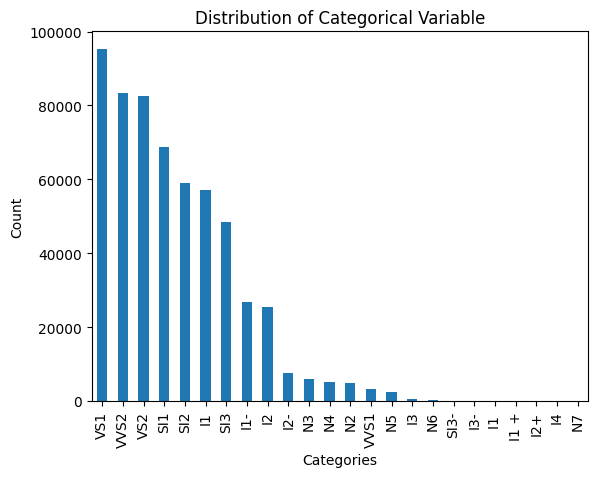

In [250]:
distribution.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categorical Variable')
plt.show()

From the graph above, the distribution of the ASK Purity variable is skewed, hence median will be used to replace missing values, which falls between N4 and N2, I'll be goingfor N4 because it occurs more than N2.

In [251]:
data2["ASK Purity"] =  data2["ASK Purity"].fillna("N4")

In [252]:
data2["Purity group"] =  data2["Purity group"].fillna("I1 & above")

In [253]:
data2.isna().sum()

Month                 0
Manager Name          0
I/O                   0
Barcode               0
Org Crts            690
ASK Purity            0
Final Purity          0
Purity group          0
ASK Color             0
Final Color           0
Color Group           0
Pcs                 249
Ask Crts              0
Fin Crts              0
Size Group            0
ASK P                 0
Final Pointer       248
ASK Diam          10535
Final Diam       325039
Final Value           0
F value               0
Jiram Value           0
Pointer Diff        248
Ask P Diff          248
Ask Size              0
S Purity           4015
dtype: int64

In [254]:
data2[(data2["Org Crts"].isna() == True)]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Pcs,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,ASK Diam,Final Diam,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
1624,Jan-23,Inhouse,Inside,221325-368,NaN,VVS2,VVS2,VVS1-VVS2,F,F,D-F,1,0.15,0.151,0.14-0.179,0.15,0.15,3.36,3.36,128.35,0.0,0.0,0.00,0.00,0.14 - 0.179,IF TO VS2
1664,Jan-23,Inhouse,Inside,221325-409,NaN,I1,I1,I1 & above,I,I,G-J,1,0.14,0.138,0.14-0.179,0.14,0.13,3.20,3.22,73.83,0.0,0.0,-0.01,-0.01,0.14 - 0.179,SI1 & DOWN
1883,Jan-23,Inhouse,Inside,221325-624,NaN,I1,SI3,I1 & above,F,G,D-F,1,0.20,0.194,0.18-0.299,0.20,0.19,3.65,3.62,130.95,0.0,0.0,0.00,-0.01,0.18 - 0.299,SI1 & DOWN
5454,Jan-23,Inhouse,Inside,227545-77,NaN,SI1,SI1,SI1-SI3,H,H,G-J,1,0.24,0.240,0.18-0.299,0.24,0.24,3.84,3.88,222,0.0,0.0,0.00,0.00,0.18 - 0.299,SI1 & DOWN
5852,Jan-23,Inhouse,Inside,22PK4491A-1158,NaN,SI1,SI1,SI1-SI3,G,G,G-J,1,0.10,0.101,0.08-0.139,0.10,0.10,2.90,2.89,64.135,0.0,0.0,0.00,0.00,0.08 - 0.139,SI1 & DOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569784,Dec-23,Inhouse,Inside,233770-896,NaN,SI1,SI1,SI1-SI3,H,H,G-J,1,0.08,0.074,0.08-0.139,0.08,0.07,2.65,2.69,37.74,0.0,0.0,0.00,-0.01,0.08 - 0.139,SI1 & DOWN
570166,Dec-23,Inhouse,Inside,232545-238,NaN,I1,I1,I1 & above,H,H,G-J,1,0.21,0.215,0.18-0.299,0.21,0.21,3.75,3.75,134.375,0.0,0.0,0.00,0.00,0.18 - 0.299,SI1 & DOWN
574074,Dec-23,Inhouse,Inside,232540-508,NaN,I1,I1,I1 & above,H,H,G-J,1,0.17,0.165,0.14-0.179,0.17,0.16,3.45,3.44,94.875,0.0,0.0,-0.01,-0.01,0.14 - 0.179,SI1 & DOWN
574725,Dec-23,Inhouse,Inside,232550-797,NaN,VS1,VS1,VS1-VS2,H,H,G-J,1,0.09,0.093,0.08-0.139,0.09,0.09,2.90,2.92,54.405,0.0,0.0,0.00,0.00,0.08 - 0.139,IF TO VS2


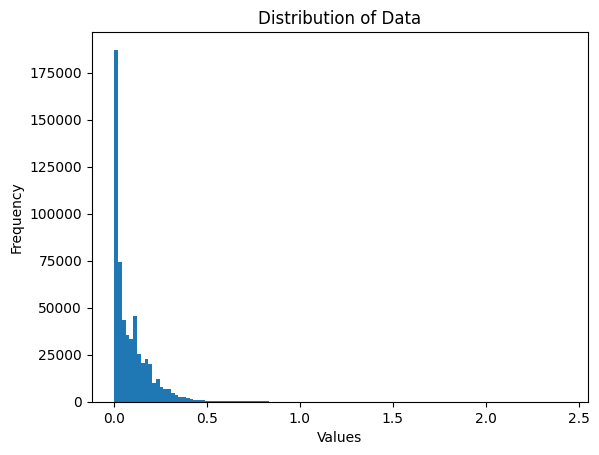

In [255]:
# Create a histogram
plt.hist(data2["Org Crts"], bins=120)  # Adjust the number of bins as needed
plt.title('Distribution of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left).

In [256]:
data2["Org Crts"] = data2["Org Crts"].fillna(data2['Org Crts'].median())

In [257]:
data2["Org Crts"].isna().sum()

0

In [258]:
data2.isna().sum()

Month                 0
Manager Name          0
I/O                   0
Barcode               0
Org Crts              0
ASK Purity            0
Final Purity          0
Purity group          0
ASK Color             0
Final Color           0
Color Group           0
Pcs                 249
Ask Crts              0
Fin Crts              0
Size Group            0
ASK P                 0
Final Pointer       248
ASK Diam          10535
Final Diam       325039
Final Value           0
F value               0
Jiram Value           0
Pointer Diff        248
Ask P Diff          248
Ask Size              0
S Purity           4015
dtype: int64

In [259]:
data2[(data2["Pcs"].isna() == True) & (data2["Final Pointer"].isna() == True) & (data2["Pointer Diff"].isna() == True) & (data2["Ask P Diff"].isna() == True)]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Pcs,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,ASK Diam,Final Diam,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
3494,Jan-23,Inhouse,Inside,22PK4500A-170,0.300,I1,I1,I1 & above,G,G,G-J,NaN,0.161,0.161,0.14-0.179,0.16,NaN,NaN,NaN,-,0.00,0.00,NaN,NaN,0.14 - 0.179,SI1 & DOWN
3497,Jan-23,Inhouse,Inside,22PK4500A-238,0.344,I2,I2,I1 & above,G,G,G-J,NaN,0.191,0.191,0.18-0.299,0.19,NaN,NaN,NaN,-,-90.73,-90.73,NaN,NaN,0.18 - 0.299,SI1 & DOWN
3815,Jan-23,Inhouse,Inside,22PK4545A-240,0.661,N3,N3,I1 & above,I,I,G-J,NaN,0.461,0.461,0.3 & up,0.46,NaN,NaN,NaN,-,0.00,0.00,NaN,NaN,0.3 & Up,SI1 & DOWN
7798,Jan-23,Inhouse,Inside,22PK4545-147-01,0.125,VS1,VS1,VS1-VS2,G,G,G-J,NaN,0.053,0.053,0.05-0.079,0.05,NaN,2.47,NaN,-,0.00,0.00,NaN,NaN,0.05 - 0.079,IF TO VS2
7799,Jan-23,Inhouse,Inside,22PK4545-203-02,0.090,VVS2,VVS2,VVS1-VVS2,G,G,G-J,NaN,0.040,0.040,0.02-0.049,0.04,NaN,2.20,NaN,-,0.00,0.00,NaN,NaN,0.02 - 0.049,IF TO VS2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522513,Oct-23,Inhouse,Inside,234535-360,0.480,SI3,SI3,SI1-SI3,G,G,G-J,NaN,0.380,0.380,0.3 & up,0.38,NaN,4.51,NaN,-,0.00,0.00,NaN,NaN,0.3 & Up,SI1 & DOWN
523562,Oct-23,Inhouse,Inside,23PK5775A-1122,0.228,I2,I2,I1 & above,H,H,G-J,NaN,0.110,0.110,0.08-0.139,0.11,NaN,NaN,NaN,-,-38.50,-38.50,NaN,NaN,0.08 - 0.139,SI1 & DOWN
523690,Oct-23,Inhouse,Inside,23PKA1500A-704,0.266,I1,I1,I1 & above,H,H,G-J,NaN,0.126,0.126,0.08-0.139,0.12,NaN,NaN,NaN,-,-52.50,-52.50,NaN,NaN,0.08 - 0.139,SI1 & DOWN
569027,Dec-23,Inhouse,Inside,234600-444,0.238,I1,I1,I1 & above,H,H,G-J,NaN,0.184,0.184,0.18-0.299,0.18,NaN,3.55,NaN,-,0.00,0.00,NaN,NaN,0.18 - 0.299,SI1 & DOWN


In [260]:
data2[(data2["Pcs"].isna() == True) & (data2["Final Pointer"].isna() == True) & (data2["Pointer Diff"].isna() == True) & (data2["Ask P Diff"].isna() == True) 
      & (data2["ASK Diam"].isna() == True) & (data2["Final Diam"].isna() == True)]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Pcs,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,ASK Diam,Final Diam,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
3494,Jan-23,Inhouse,Inside,22PK4500A-170,0.300,I1,I1,I1 & above,G,G,G-J,NaN,0.161,0.161,0.14-0.179,0.16,NaN,NaN,NaN,-,0.00,0.00,NaN,NaN,0.14 - 0.179,SI1 & DOWN
3497,Jan-23,Inhouse,Inside,22PK4500A-238,0.344,I2,I2,I1 & above,G,G,G-J,NaN,0.191,0.191,0.18-0.299,0.19,NaN,NaN,NaN,-,-90.73,-90.73,NaN,NaN,0.18 - 0.299,SI1 & DOWN
3815,Jan-23,Inhouse,Inside,22PK4545A-240,0.661,N3,N3,I1 & above,I,I,G-J,NaN,0.461,0.461,0.3 & up,0.46,NaN,NaN,NaN,-,0.00,0.00,NaN,NaN,0.3 & Up,SI1 & DOWN
9444,Jan-23,Inhouse,Inside,22PK4500A-330,0.421,I1,I1,I1 & above,J,J,G-J,NaN,0.200,0.200,0.18-0.299,0.20,NaN,NaN,NaN,-,-110.00,-110.00,NaN,NaN,0.18 - 0.299,SI1 & DOWN
19227,Jan-23,Dominion Diamond,Outside,22PK0400A-33,0.162,VS2,VS2,VS1-VS2,J,J,G-J,NaN,0.071,0.071,0.05-0.079,0.07,NaN,NaN,NaN,-,-26.98,-26.98,NaN,NaN,0.05 - 0.079,IF TO VS2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500829,Oct-23,Inhouse,Inside,23PKA1475A-129,0.542,SI2,SI2,SI1-SI3,H,H,G-J,NaN,0.321,0.321,0.3 & up,0.32,NaN,NaN,NaN,-,0.00,0.00,NaN,NaN,0.3 & Up,SI1 & DOWN
510579,Oct-23,Inhouse,Inside,23PKA1485A-414,0.473,I2,I2,I1 & above,G,G,G-J,NaN,0.211,0.211,0.18-0.299,0.21,NaN,NaN,NaN,-,-52.75,-52.75,NaN,NaN,0.18 - 0.299,SI1 & DOWN
513237,Oct-23,Inhouse,Inside,23PKA1490A-384,0.225,VVS2,VVS2,VVS1-VVS2,K,K,K-M,NaN,0.090,0.090,0.08-0.139,0.09,NaN,NaN,NaN,-,-42.30,-42.30,NaN,NaN,0.08 - 0.139,IF TO VS2
523562,Oct-23,Inhouse,Inside,23PK5775A-1122,0.228,I2,I2,I1 & above,H,H,G-J,NaN,0.110,0.110,0.08-0.139,0.11,NaN,NaN,NaN,-,-38.50,-38.50,NaN,NaN,0.08 - 0.139,SI1 & DOWN


In [261]:
data2["Pcs"].value_counts()

1    576796
C         1
Name: Pcs, dtype: int64

In [262]:
data2 = data2.drop(columns=['Pcs'])

In [263]:
data2["Final Pointer"].value_counts()

0.01    120450
0.00     88662
0.02     43077
0.09     37979
0.08     37036
         ...  
1.16         1
1.10         1
0.92         1
1.21         1
0.97         1
Name: Final Pointer, Length: 107, dtype: int64

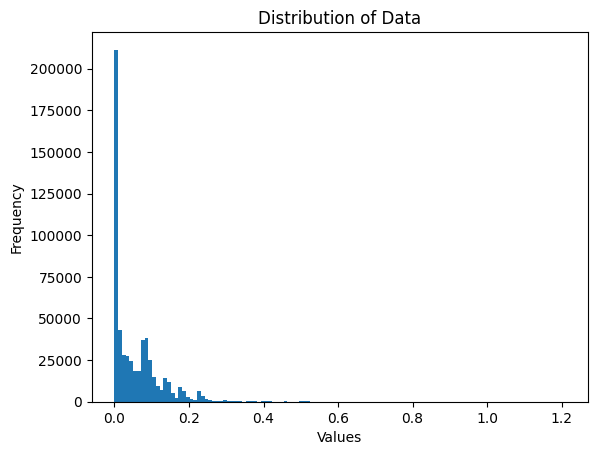

In [264]:
plt.hist(data2["Final Pointer"], bins=120)  # Adjust the number of bins as needed
plt.title('Distribution of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [265]:
data2["Final Pointer"] = data2["Final Pointer"].fillna(data2['Final Pointer'].median())

In [266]:
data2["Final Pointer"].isna().sum()

0

In [267]:
data2["Pointer Diff"].value_counts()

 0.000    362592
-0.010     72962
-0.010     39552
-0.010     30129
-0.010     30108
           ...  
-0.250         1
 0.030         1
-0.029         1
-0.070         1
-1.850         1
Name: Pointer Diff, Length: 156, dtype: int64

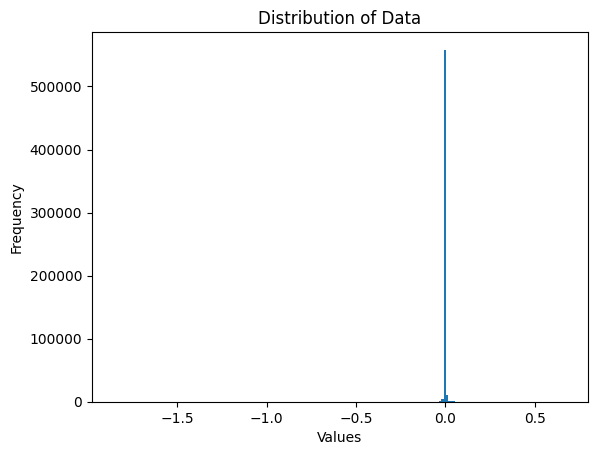

In [268]:
plt.hist(data2["Pointer Diff"], bins=200)  # Adjust the number of bins as needed
plt.title('Distribution of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [269]:
data2["Pointer Diff"] = data2["Pointer Diff"].fillna(data2['Pointer Diff'].mean())

In [270]:
data2["Pointer Diff"].isna().sum()

0

In [271]:
data2["Ask P Diff"].value_counts()

 0.00    325594
-0.01     73780
-0.01     58800
-0.01     45156
-0.01     30149
          ...  
-0.24         1
 0.08         1
-0.06         1
 0.08         1
-0.22         1
Name: Ask P Diff, Length: 141, dtype: int64

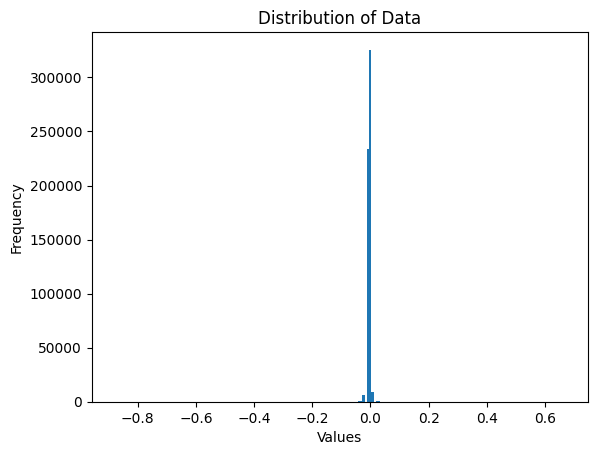

In [272]:
plt.hist(data2["Ask P Diff"], bins=200)  # Adjust the number of bins as needed
plt.title('Distribution of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [273]:
data2["Ask P Diff"] = data2["Ask P Diff"].fillna(data2['Ask P Diff'].mean())

In [274]:
data2["Ask P Diff"].isna().sum()

0

In [275]:
data2 = data2.drop(columns=['Final Diam'])
data2 = data2.drop(columns=['ASK Diam'])

In [276]:
data2.isna().sum()

Month               0
Manager Name        0
I/O                 0
Barcode             0
Org Crts            0
ASK Purity          0
Final Purity        0
Purity group        0
ASK Color           0
Final Color         0
Color Group         0
Ask Crts            0
Fin Crts            0
Size Group          0
ASK P               0
Final Pointer       0
Final Value         0
F value             0
Jiram Value         0
Pointer Diff        0
Ask P Diff          0
Ask Size            0
S Purity         4015
dtype: int64

In [277]:
data2["S Purity"].value_counts()

SI1 & DOWN    310910
IF TO VS2     262093
0                 28
Name: S Purity, dtype: int64

In [278]:
data2[(data2["S Purity"].isna() == True)]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
39601,Jan-23,Inhouse,Inside,22PK4520-386-02,0.139,VS2,VS2,VS1-VS2,G,G,G-J,0.080,0.074,0.08-0.139,0.08,0.07,40.7,0.0,0.0,0.00000,-0.010000,0.08 - 0.139,NaN
72572,Feb-23,Diamcor Mining,Outside,233340-263-06,0.056,N4,VS1,I1 & above,H,H,G-J,0.010,0.010,0.019 & below,0.01,0.01,5.45,0.0,0.0,0.00000,0.000000,0 - 0.019,NaN
86521,Feb-23,Bc Gems & Diamond,Outside,227615-48-03,0.110,I1-,I3,I1 & above,H,H,G-J,0.090,0.082,0.08-0.139,0.09,0.08,15.17,0.0,0.0,-0.01000,-0.010000,0.08 - 0.139,NaN
109913,Mar-23,Inhouse,Inside,222790-533.1,0.090,N3,N3,I1 & above,J,J,G-J,0.100,0.100,0.08-0.139,0.10,0.04,-,0.0,0.0,-0.00327,-0.004129,0.08 - 0.139,NaN
200464,Apr-23,Inhouse,Inside,23PK1175A-280,0.152,VVS2,VVS2,VVS1-VVS2,G,G,G-J,0.091,0.083,0.08-0.139,0.09,0.08,50.63,0.0,0.0,0.00000,-0.010000,0.08 - 0.139,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532328,Nov-23,Inhouse,Inside,234535-516,0.377,I1 +,SI3,I1 & above,F,G,D-F,0.308,0.300,0.3 & up,0.30,0.30,237,0.0,0.0,0.00000,0.000000,0.3 & Up,NaN
532337,Nov-23,Inhouse,Inside,234535-95,0.286,I1 +,SI3,I1 & above,F,G,D-F,0.233,0.230,0.18-0.299,0.23,0.23,172.5,0.0,0.0,0.00000,0.000000,0.18 - 0.299,NaN
534926,Nov-23,Rolex Canada Ltd,Outside,232515-1364,0.057,I1 +,I1 +,I1 & above,H,H,G-J,0.050,0.042,0.05-0.079,0.05,0.04,-,0.0,0.0,-0.01000,-0.010000,0.05 - 0.079,NaN
536126,Nov-23,Rolex Canada Ltd,Outside,232520-526-01,0.012,I2+,I2+,I1 & above,H,H,G-J,0.010,0.007,0.019 & below,0.01,0.00,-,0.0,0.0,-0.01000,-0.010000,0 - 0.019,NaN


In [279]:
data2[(data2["S Purity"] == "IF TO VS2")]


,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
4,Jan-23,Diamcor Mining,Outside,227530-1-01,0.006,VS2,VS1,VS1-VS2,G,H,G-J,0.005,0.005,0.019 & below,0.00,0.00,2.725,0.0,0.0,0.00,0.00,0 - 0.019,IF TO VS2
5,Jan-23,Diamcor Mining,Outside,227530-10-03,0.012,VS1,SI1,VS1-VS2,G,G,G-J,0.008,0.008,0.019 & below,0.00,0.00,3.76,0.0,0.0,0.00,0.00,0 - 0.019,IF TO VS2
6,Jan-23,Diamcor Mining,Outside,227530-100-04,0.016,VS1,VS1,VS1-VS2,G,G,G-J,0.010,0.008,0.019 & below,0.01,0.00,4.36,0.0,0.0,-0.01,-0.01,0 - 0.019,IF TO VS2
7,Jan-23,Diamcor Mining,Outside,227530-103-01,0.014,VS2,VS1,VS1-VS2,H,H,G-J,0.010,0.008,0.019 & below,0.01,0.00,4.36,0.0,0.0,-0.01,-0.01,0 - 0.019,IF TO VS2
8,Jan-23,Diamcor Mining,Outside,227530-103-02,0.020,VS2,I1,VS1-VS2,G,G,G-J,0.015,0.014,0.019 & below,0.01,0.01,5.6,0.0,0.0,0.00,0.00,0 - 0.019,IF TO VS2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577041,Dec-23,Asia Pacific International Inc,Outside,232560-93-03,0.036,VS2,VS2,VS1-VS2,H,H,G-J,0.024,0.027,0.02-0.049,0.02,0.02,11.34,0.0,0.0,0.00,0.00,0.02 - 0.049,IF TO VS2
577043,Dec-23,Asia Pacific International Inc,Outside,232565-1039-01,0.029,VS1,VS1,VS1-VS2,G,G,G-J,0.020,0.022,0.02-0.049,0.02,0.02,9.46,0.0,0.0,0.00,0.00,0.02 - 0.049,IF TO VS2
577048,Dec-23,Asia Pacific International Inc,Outside,232565-389-01,0.028,VS2,VS2,VS1-VS2,G,G,G-J,0.020,0.017,0.02-0.049,0.02,0.01,7.905,0.0,0.0,-0.01,-0.01,0.02 - 0.049,IF TO VS2
577052,Dec-23,Asia Pacific International Inc,Outside,232565-899-01,0.026,VS2,VS2,VS1-VS2,G,G,G-J,0.020,0.022,0.02-0.049,0.02,0.02,9.24,0.0,0.0,0.00,0.00,0.02 - 0.049,IF TO VS2


In [280]:
data2[(data2["Ask Size"] == "0.02 - 0.049")]

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity
15,Jan-23,Dominion Diamond,Outside,227530-122-01,0.043,VVS2,VVS2,VVS1-VVS2,G,G,G-J,0.030,0.032,0.02-0.049,0.03,0.03,15.84,0.0,0.0,0.00,0.00,0.02 - 0.049,IF TO VS2
23,Jan-23,Dominion Diamond,Outside,227530-134-02,0.041,VS2,VS2,VS1-VS2,G,G,G-J,0.025,0.030,0.02-0.049,0.02,0.03,13.5,0.0,0.0,0.01,0.01,0.02 - 0.049,IF TO VS2
27,Jan-23,Dominion Diamond,Outside,227530-140-01,0.056,VS2,VS1,VS1-VS2,G,H,G-J,0.045,0.040,0.02-0.049,0.04,0.04,18.8,0.0,0.0,0.00,0.00,0.02 - 0.049,IF TO VS2
77,Jan-23,Dominion Diamond,Outside,227530-245-01,0.042,VS1,VS1,VS1-VS2,G,G,G-J,0.030,0.026,0.02-0.049,0.03,0.02,14.17,0.0,0.0,-0.01,-0.01,0.02 - 0.049,IF TO VS2
78,Jan-23,Dominion Diamond,Outside,227530-245-04,0.023,VS1,VS1,VS1-VS2,G,G,G-J,0.020,0.017,0.02-0.049,0.02,0.01,9.265,0.0,0.0,-0.01,-0.01,0.02 - 0.049,IF TO VS2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577046,Dec-23,R & B Gems Marketing Inc,Outside,232565-297-01,0.049,SI1,SI1,SI1-SI3,H,H,G-J,0.040,0.036,0.02-0.049,0.04,0.03,16.56,0.0,0.0,-0.01,-0.01,0.02 - 0.049,SI1 & DOWN
577048,Dec-23,Asia Pacific International Inc,Outside,232565-389-01,0.028,VS2,VS2,VS1-VS2,G,G,G-J,0.020,0.017,0.02-0.049,0.02,0.01,7.905,0.0,0.0,-0.01,-0.01,0.02 - 0.049,IF TO VS2
577050,Dec-23,Rolex Canada Ltd,Outside,232565-558,0.052,I1-,I1-,I1 & above,K,K,K-M,0.040,0.041,0.02-0.049,0.04,0.04,12.915,0.0,0.0,0.00,0.00,0.02 - 0.049,SI1 & DOWN
577051,Dec-23,Rolex Canada Ltd,Outside,232565-780-01,0.027,I2,I2,I1 & above,G,G,G-J,0.020,0.020,0.02-0.049,0.02,0.02,6.4,0.0,0.0,0.00,0.00,0.02 - 0.049,SI1 & DOWN


In [281]:
SP_mode = data2["S Purity"].mode()[0]

In [282]:
SP_mode

'SI1 & DOWN'

In [283]:
data2["S Purity"] = data2["S Purity"].fillna(SP_mode)

In [284]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577046 entries, 0 to 577056
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Month          577046 non-null  object 
 1   Manager Name   577046 non-null  object 
 2   I/O            577046 non-null  object 
 3   Barcode        577046 non-null  object 
 4   Org Crts       577046 non-null  float64
 5   ASK Purity     577046 non-null  object 
 6   Final Purity   577046 non-null  object 
 7   Purity group   577046 non-null  object 
 8   ASK Color      577046 non-null  object 
 9   Final Color    577046 non-null  object 
 10  Color Group    577046 non-null  object 
 11  Ask Crts       577046 non-null  float64
 12  Fin Crts       577046 non-null  float64
 13  Size Group     577046 non-null  object 
 14  ASK P          577046 non-null  float64
 15  Final Pointer  577046 non-null  float64
 16  Final Value    577046 non-null  object 
 17  F value        577046 non-nul

In [285]:
df1 = df.copy()

In [286]:
df1.shape, data2.shape

((577756, 92), (577046, 23))

In [287]:
df1["Country"] = df1['Country'][:-710]

In [288]:
df1["Country"].dropna()

0               USA
1           Belgium
2           Belgium
3               UAE
4         Hong Kong
            ...    
577041    Australia
577042    Hong Kong
577043          UAE
577044    Hong Kong
577045    Australia
Name: Country, Length: 577046, dtype: object

In [301]:
data2 = data2.assign(new_column=df1['Country'])

In [296]:
data2['Diamond Price'] = data['M Value'] * 100


In [294]:
data2['Diamond Price'].value_counts()

500.0     12601
460.0      8417
540.0      7733
525.0      6470
400.0      6284
          ...  
4252.5        1
9856.0        1
4333.5        1
7992.5        1
747.0         1
Name: Diamond Price, Length: 10391, dtype: int64

In [ ]:
data2.head()

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity,new_column,Diamond_Price
0,Jan-23,Inhouse,Inside,222625-37.1,0.209,N4,N4,I1 & above,G,G,G-J,0.180,0.180,0.18-0.299,0.18,0.18,76.5,0.0,0.0,0.00,0.00,0.18 - 0.299,SI1 & DOWN,USA,7650.0
1,Jan-23,Inhouse,Inside,222625A-6.1,0.171,I2,I2,I1 & above,G,G,G-J,0.140,0.128,0.14-0.179,0.14,0.12,60.16,0.0,0.0,0.00,-0.02,0.14 - 0.179,SI1 & DOWN,Belgium,4800
2,Jan-23,Inhouse,Inside,222645-607,0.173,I2-,I2-,I1 & above,G,H,G-J,0.142,0.132,0.14-0.179,0.14,0.13,49.5,0.0,0.0,-0.01,-0.01,0.14 - 0.179,SI1 & DOWN,Belgium,5396.0
3,Jan-23,Inhouse,Inside,222665-486,0.625,N2,N2,I1 & above,I,I,G-J,0.489,0.465,0.3 & up,0.48,0.46,627.75,0.0,0.0,-0.02,-0.02,0.3 & Up,SI1 & DOWN,UAE,66015.0
4,Jan-23,Diamcor Mining,Outside,227530-1-01,0.006,VS2,VS1,VS1-VS2,G,H,G-J,0.005,0.005,0.019 & below,0.00,0.00,2.725,0.0,0.0,0.00,0.00,0 - 0.019,IF TO VS2,Hong Kong,252.5


In [306]:
data2["new_column"] = data2["new_column"].fillna(data2["new_column"].mode()[0])

In [307]:
data2["new_column"]

0

In [308]:
data2.to_csv('Cleaned_diamond_data.csv', index=False)

In [309]:
data2.head()

,Month,Manager Name,I/O,Barcode,Org Crts,ASK Purity,Final Purity,Purity group,ASK Color,Final Color,Color Group,Ask Crts,Fin Crts,Size Group,ASK P,Final Pointer,Final Value,F value,Jiram Value,Pointer Diff,Ask P Diff,Ask Size,S Purity,new_column,Diamond Price
0,Jan-23,Inhouse,Inside,222625-37.1,0.209,N4,N4,I1 & above,G,G,G-J,0.180,0.180,0.18-0.299,0.18,0.18,76.5,0.0,0.0,0.00,0.00,0.18 - 0.299,SI1 & DOWN,USA,7650.0
1,Jan-23,Inhouse,Inside,222625A-6.1,0.171,I2,I2,I1 & above,G,G,G-J,0.140,0.128,0.14-0.179,0.14,0.12,60.16,0.0,0.0,0.00,-0.02,0.14 - 0.179,SI1 & DOWN,Belgium,4800
2,Jan-23,Inhouse,Inside,222645-607,0.173,I2-,I2-,I1 & above,G,H,G-J,0.142,0.132,0.14-0.179,0.14,0.13,49.5,0.0,0.0,-0.01,-0.01,0.14 - 0.179,SI1 & DOWN,Belgium,5396.0
3,Jan-23,Inhouse,Inside,222665-486,0.625,N2,N2,I1 & above,I,I,G-J,0.489,0.465,0.3 & up,0.48,0.46,627.75,0.0,0.0,-0.02,-0.02,0.3 & Up,SI1 & DOWN,UAE,66015.0
4,Jan-23,Diamcor Mining,Outside,227530-1-01,0.006,VS2,VS1,VS1-VS2,G,H,G-J,0.005,0.005,0.019 & below,0.00,0.00,2.725,0.0,0.0,0.00,0.00,0 - 0.019,IF TO VS2,Hong Kong,252.5
